## Mobile operator.

The goal of the project is to find the most profitable prepaid plan (Surf or Ultimate).  

### Calls

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st 

In [2]:
df_calls=pd.read_csv('/datasets/megaline_calls.csv')
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [3]:
df_calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [4]:
len(df_calls.query('duration==0'))

26834

There are 137735 entries in the dataset, 4 columns. 1 column is integer, 1 is float and 2 columns are strings. 
There are no missing values in the table. 
There aren't any duplicate rows. 
Describe method gives us general information about the data (count, mean, min, max, standard deviation). We can notice that some calls have duration of 0 minutes, 26834 such calls. 
Zero duration calls can appear because, for example, client called but didn't get a response from the other side. So, the length of the call results in zero.

Let's convert data from a string into the datetime type using the pd.to_datetime() method.

In [5]:
df_calls['call_date']=pd.to_datetime(df_calls['call_date'],format='%Y-%m-%d')

Now we'll round up each duration of call using ceil() function.

In [6]:
df_calls['duration']=df_calls['duration'].apply(np.ceil)

### Internet

In [7]:
df_internet=pd.read_csv('/datasets/megaline_internet.csv')
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [8]:
df_internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

There are 104825 entries in the dataset, 4 columns. 1 column is integer, 1 is float and 2 columns are strings. There are no missing values in the table. There aren't any duplicate rows. 
The same as for calls table, we have 0 megabytes traffic spent during a session. 
It may be that client connected to the internet but used just a few bytes that resulted in 0.00 Mbytes due to rounding.

Let's convert data from a string into the datetime type using the pd.to_datetime() method.

In [9]:
df_internet['session_date']=pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')

Like duration of call we'll round up megabytes traffic.

In [10]:
df_internet['mb_used']=df_internet['mb_used'].apply(np.ceil)

### Messages

In [11]:
df_msg=pd.read_csv('/datasets/megaline_messages.csv')
df_msg.info()
df_msg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


There are 76051 entries in the dataset, 3 columns. 1 column is integer, 2 columns are strings. There are no missing values in the table. There aren't any duplicate rows. 

In [12]:
df_msg['message_date']=pd.to_datetime(df_msg['message_date'],format='%Y-%m-%d')

### Tariffs

In [13]:
df_tariff=pd.read_csv('/datasets/megaline_tariffs.csv')
df_tariff.info()
df_tariff.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
tariff_name              2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


There are 2 entries in the dataset, 8 columns. 5 columns are integers, 2 columns are floats and 1 column is string. 

### Users

In [14]:
df_user=pd.read_csv('/datasets/megaline_users.csv')
df_user.info()
df_user.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


There are 500 entries in the dataset, 8 columns. 2 columns are integer, 6 columns are strings.
There aren't any duplicate rows. 
There are 466 missing values in 'churn_date' column. Here NaNs mean that calling plan is active.

Convert into date type two columns : 'reg_date', 'churn_date'.

In [15]:
df_user['reg_date']=pd.to_datetime(df_user['reg_date'],format='%Y-%m-%d')

In [16]:
df_user['churn_date']=pd.to_datetime(df_user['churn_date'],format='%Y-%m-%d')

In [17]:
df_user['reg_date'].min(), df_calls['call_date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

We have data for one year (2018). We can use dt.month to creat new column with number of month in call date.

In [18]:
df_calls['month']=df_calls['call_date'].dt.month

In [19]:
df_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


For each user let's count the number of calls made and minutes spent per month, using calls table.

In [20]:
calls_month=df_calls.groupby(['user_id','month']).agg({'id':'count','duration':'sum'}).reset_index()
calls_month.columns=['user_id','month','call_count_per_month','duration_per_month']
calls_month.head()

,user_id,month,call_count_per_month,duration_per_month
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


Now we'll count the number of SMS sent per month for each user using message table. 

In [21]:
df_msg['month']=df_msg['message_date'].dt.month

In [22]:
df_msg.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [23]:
msg_month=df_msg.groupby(['user_id','month'])['id'].agg('count').reset_index()
msg_month.columns=['user_id','month','msg_count_per_month']
msg_month.head()

,user_id,month,msg_count_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


And now we'll find the volume of web traffic per month for each user using internet table. 

First, add 'month' column to the table. 

In [24]:
df_internet['month']=df_internet['session_date'].dt.month

In [25]:
df_internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,90.0,12
1,1000_204,1000,2018-12-31,0.0,12
2,1000_379,1000,2018-12-28,661.0,12
3,1000_413,1000,2018-12-26,271.0,12
4,1000_442,1000,2018-12-27,881.0,12


In [26]:
internet_month=df_internet.groupby(['user_id','month'])['mb_used'].agg('sum').reset_index()
internet_month.columns=['user_id','month','mb_count_per_month']
internet_month.head()

,user_id,month,mb_count_per_month
0,1000,12,1903.0
1,1001,8,6929.0
2,1001,9,13333.0
3,1001,10,22356.0
4,1001,11,18524.0


Let's find monthly profit from each of the users. 
First, outer merge three tables (calls, message, internet) for each user per month.

In [27]:
monthly_per_user=(calls_month
          .merge(msg_month, how='outer', on=['user_id','month'])
          .merge(internet_month,how='outer', on=['user_id','month']))
monthly_per_user.head()

,user_id,month,call_count_per_month,duration_per_month,msg_count_per_month,mb_count_per_month
0,1000,12,16.0,124.0,11.0,1903.0
1,1001,8,27.0,182.0,30.0,6929.0
2,1001,9,49.0,315.0,44.0,13333.0
3,1001,10,65.0,393.0,53.0,22356.0
4,1001,11,64.0,426.0,36.0,18524.0


Second, add user table in oder to get the information about tariff for each user. 
Unnecessary columns would be dropped.

In [28]:
monthly_per_user_tariff=monthly_per_user.merge(df_user, on=['user_id'])
monthly_per_user_tariff=monthly_per_user_tariff.drop(['first_name','last_name','age','city','reg_date','churn_date'], axis=1)
monthly_per_user_tariff

,user_id,month,call_count_per_month,duration_per_month,msg_count_per_month,mb_count_per_month,tariff
0,1000,12,16.0,124.0,11.0,1903.0,ultimate
1,1001,8,27.0,182.0,30.0,6929.0,surf
2,1001,9,49.0,315.0,44.0,13333.0,surf
3,1001,10,65.0,393.0,53.0,22356.0,surf
4,1001,11,64.0,426.0,36.0,18524.0,surf
...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,36768.0,ultimate
2289,1349,10,NaN,NaN,76.0,13105.0,surf
2290,1349,11,NaN,NaN,72.0,17145.0,surf
2291,1349,12,NaN,NaN,61.0,13052.0,surf


NaNs mean that user didn't make calls or didn't send sms or didn't use mobile internet during the month. Not using some of the services in calling plan doesn't change monthly charge. 
Let's fill Nans by value 0. 

In [29]:
monthly_per_user_tariff[['call_count_per_month','duration_per_month','msg_count_per_month','mb_count_per_month']]=monthly_per_user_tariff[['call_count_per_month','duration_per_month','msg_count_per_month','mb_count_per_month']].fillna(0)

Rename column tariff to tariff_name in order to merge table above with tariff table.

In [30]:
monthly_per_user_tariff=monthly_per_user_tariff.rename(columns={'tariff':'tariff_name'})
monthly_per_user_tariff=monthly_per_user_tariff.merge(df_tariff, on=['tariff_name'])
monthly_per_user_tariff

,user_id,month,call_count_per_month,duration_per_month,msg_count_per_month,mb_count_per_month,tariff_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,1903.0,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1006,11,2.0,10.0,15.0,2072.0,ultimate,1000,30720,3000,70,7,0.01,0.01
2,1006,12,9.0,59.0,139.0,32144.0,ultimate,1000,30720,3000,70,7,0.01,0.01
3,1008,10,71.0,476.0,21.0,17131.0,ultimate,1000,30720,3000,70,7,0.01,0.01
4,1008,11,63.0,446.0,37.0,23706.0,ultimate,1000,30720,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,0.0,62.0,42904.0,surf,50,15360,500,20,10,0.03,0.03
2289,1194,12,0.0,0.0,56.0,31119.0,surf,50,15360,500,20,10,0.03,0.03
2290,1349,10,0.0,0.0,76.0,13105.0,surf,50,15360,500,20,10,0.03,0.03
2291,1349,11,0.0,0.0,72.0,17145.0,surf,50,15360,500,20,10,0.03,0.03


Now find if user exceeded the package limits in calls, messages or internet.

In [31]:
monthly_per_user_tariff['msg_diff']=monthly_per_user_tariff['msg_count_per_month']-monthly_per_user_tariff['messages_included']
monthly_per_user_tariff['call_diff']=monthly_per_user_tariff['duration_per_month']-monthly_per_user_tariff['minutes_included']
monthly_per_user_tariff['mb_diff']=monthly_per_user_tariff['mb_count_per_month']-monthly_per_user_tariff['mb_per_month_included']
monthly_per_user_tariff

,user_id,month,call_count_per_month,duration_per_month,msg_count_per_month,mb_count_per_month,tariff_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,msg_diff,call_diff,mb_diff
0,1000,12,16.0,124.0,11.0,1903.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-989.0,-2876.0,-28817.0
1,1006,11,2.0,10.0,15.0,2072.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-985.0,-2990.0,-28648.0
2,1006,12,9.0,59.0,139.0,32144.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-861.0,-2941.0,1424.0
3,1008,10,71.0,476.0,21.0,17131.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-979.0,-2524.0,-13589.0
4,1008,11,63.0,446.0,37.0,23706.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-963.0,-2554.0,-7014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,0.0,62.0,42904.0,surf,50,15360,500,20,10,0.03,0.03,12.0,-500.0,27544.0
2289,1194,12,0.0,0.0,56.0,31119.0,surf,50,15360,500,20,10,0.03,0.03,6.0,-500.0,15759.0
2290,1349,10,0.0,0.0,76.0,13105.0,surf,50,15360,500,20,10,0.03,0.03,26.0,-500.0,-2255.0
2291,1349,11,0.0,0.0,72.0,17145.0,surf,50,15360,500,20,10,0.03,0.03,22.0,-500.0,1785.0


Let's find profit from each user per month according to his calling plan. If difference between the number of messages sent and number of messages included in calling plan is less then 0 it means that user didn't exceed the plan and he paid 0$. But if the difference is more then 0, than user pays extra money according to his plan. The same process for calls and internet.
A couple of notes:
* "Megaline" always rounds up the minute and megabyte values. If the call lasted just one second, it will be counted as one minute. At the begining we round up duration of calls and megabytes traffic.
* usd_per_gb - the price per extra gigabyte of web traffic after exceeding the package limits (1 GB = 1024 megabytes).We will take it into account calculating mb_cost. 

In [32]:
monthly_per_user_tariff['msg_cost'] = np.where(monthly_per_user_tariff['msg_diff']<=0, 0, monthly_per_user_tariff['msg_diff']*monthly_per_user_tariff['usd_per_message'])
monthly_per_user_tariff['calls_cost'] = np.where(monthly_per_user_tariff['call_diff']<=0, 0, monthly_per_user_tariff['call_diff']*monthly_per_user_tariff['usd_per_minute'])
monthly_per_user_tariff['mb_cost'] = np.where(monthly_per_user_tariff['mb_diff']<=0, 0, monthly_per_user_tariff['mb_diff']*monthly_per_user_tariff['usd_per_gb']/1024)

In [33]:
monthly_per_user_tariff

,user_id,month,call_count_per_month,duration_per_month,msg_count_per_month,mb_count_per_month,tariff_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,msg_diff,call_diff,mb_diff,msg_cost,calls_cost,mb_cost
0,1000,12,16.0,124.0,11.0,1903.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-989.0,-2876.0,-28817.0,0.00,0.0,0.000000
1,1006,11,2.0,10.0,15.0,2072.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-985.0,-2990.0,-28648.0,0.00,0.0,0.000000
2,1006,12,9.0,59.0,139.0,32144.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-861.0,-2941.0,1424.0,0.00,0.0,9.734375
3,1008,10,71.0,476.0,21.0,17131.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-979.0,-2524.0,-13589.0,0.00,0.0,0.000000
4,1008,11,63.0,446.0,37.0,23706.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-963.0,-2554.0,-7014.0,0.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,0.0,62.0,42904.0,surf,50,15360,500,20,10,0.03,0.03,12.0,-500.0,27544.0,0.36,0.0,268.984375
2289,1194,12,0.0,0.0,56.0,31119.0,surf,50,15360,500,20,10,0.03,0.03,6.0,-500.0,15759.0,0.18,0.0,153.896484
2290,1349,10,0.0,0.0,76.0,13105.0,surf,50,15360,500,20,10,0.03,0.03,26.0,-500.0,-2255.0,0.78,0.0,0.000000
2291,1349,11,0.0,0.0,72.0,17145.0,surf,50,15360,500,20,10,0.03,0.03,22.0,-500.0,1785.0,0.66,0.0,17.431641


Now we'll find total profit from each user per month. We'll sum three last columns msg_cost+calls_cost+mb_cost and usd_monthly_pay depending on calling plan. 

In [34]:
monthly_per_user_tariff['profit_per_user']=monthly_per_user_tariff['msg_cost']+monthly_per_user_tariff['calls_cost']+monthly_per_user_tariff['mb_cost']+monthly_per_user_tariff['usd_monthly_pay']
monthly_per_user_tariff

,user_id,month,call_count_per_month,duration_per_month,msg_count_per_month,mb_count_per_month,tariff_name,messages_included,mb_per_month_included,minutes_included,...,usd_per_gb,usd_per_message,usd_per_minute,msg_diff,call_diff,mb_diff,msg_cost,calls_cost,mb_cost,profit_per_user
0,1000,12,16.0,124.0,11.0,1903.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-989.0,-2876.0,-28817.0,0.00,0.0,0.000000,70.000000
1,1006,11,2.0,10.0,15.0,2072.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-985.0,-2990.0,-28648.0,0.00,0.0,0.000000,70.000000
2,1006,12,9.0,59.0,139.0,32144.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-861.0,-2941.0,1424.0,0.00,0.0,9.734375,79.734375
3,1008,10,71.0,476.0,21.0,17131.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-979.0,-2524.0,-13589.0,0.00,0.0,0.000000,70.000000
4,1008,11,63.0,446.0,37.0,23706.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-963.0,-2554.0,-7014.0,0.00,0.0,0.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,0.0,62.0,42904.0,surf,50,15360,500,...,10,0.03,0.03,12.0,-500.0,27544.0,0.36,0.0,268.984375,289.344375
2289,1194,12,0.0,0.0,56.0,31119.0,surf,50,15360,500,...,10,0.03,0.03,6.0,-500.0,15759.0,0.18,0.0,153.896484,174.076484
2290,1349,10,0.0,0.0,76.0,13105.0,surf,50,15360,500,...,10,0.03,0.03,26.0,-500.0,-2255.0,0.78,0.0,0.000000,20.780000
2291,1349,11,0.0,0.0,72.0,17145.0,surf,50,15360,500,...,10,0.03,0.03,22.0,-500.0,1785.0,0.66,0.0,17.431641,38.091641


Divide the table above into two tables: "Ultimate" calling plan and "Surf"

In [35]:
ultimate=monthly_per_user_tariff.query('tariff_name=="ultimate"')
ultimate

,user_id,month,call_count_per_month,duration_per_month,msg_count_per_month,mb_count_per_month,tariff_name,messages_included,mb_per_month_included,minutes_included,...,usd_per_gb,usd_per_message,usd_per_minute,msg_diff,call_diff,mb_diff,msg_cost,calls_cost,mb_cost,profit_per_user
0,1000,12,16.0,124.0,11.0,1903.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-989.0,-2876.0,-28817.0,0.0,0.0,0.000000,70.000000
1,1006,11,2.0,10.0,15.0,2072.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-985.0,-2990.0,-28648.0,0.0,0.0,0.000000,70.000000
2,1006,12,9.0,59.0,139.0,32144.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-861.0,-2941.0,1424.0,0.0,0.0,9.734375,79.734375
3,1008,10,71.0,476.0,21.0,17131.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-979.0,-2524.0,-13589.0,0.0,0.0,0.000000,70.000000
4,1008,11,63.0,446.0,37.0,23706.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-963.0,-2554.0,-7014.0,0.0,0.0,0.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1493,12,65.0,473.0,0.0,15307.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-1000.0,-2527.0,-15413.0,0.0,0.0,0.000000,70.000000
716,1497,12,54.0,300.0,50.0,11120.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-950.0,-2700.0,-19600.0,0.0,0.0,0.000000,70.000000
717,1204,11,0.0,0.0,42.0,21366.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-958.0,-3000.0,-9354.0,0.0,0.0,0.000000,70.000000
718,1204,12,0.0,0.0,78.0,36768.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-922.0,-3000.0,6048.0,0.0,0.0,41.343750,111.343750


In [36]:
ultimate[['duration_per_month','msg_count_per_month','mb_count_per_month']].describe()

,duration_per_month,msg_count_per_month,mb_count_per_month
count,720.000000,720.000000,720.000000
mean,430.450000,37.551389,17234.643056
std,240.508762,34.767179,7859.103172
min,0.000000,0.000000,0.000000
25%,260.000000,7.000000,12681.250000
50%,424.000000,30.000000,16879.000000
75%,565.250000,61.000000,21043.000000
max,1369.000000,166.000000,46634.000000


"Ultimate" plan includes 3000 monthly minutes, 1000 SMS and 30 GB of web traffic. In average users need about 40 sms, 400 minutes and 17 GB trafiic per month. In average users don't exceed the package limits.  

In [37]:
ultimate[['duration_per_month','msg_count_per_month','mb_count_per_month']].var() 

duration_per_month     5.784446e+04
msg_count_per_month    1.208757e+03
mb_count_per_month     6.176550e+07
dtype: float64

In [38]:
surf=monthly_per_user_tariff.query('tariff_name=="surf"')
surf

,user_id,month,call_count_per_month,duration_per_month,msg_count_per_month,mb_count_per_month,tariff_name,messages_included,mb_per_month_included,minutes_included,...,usd_per_gb,usd_per_message,usd_per_minute,msg_diff,call_diff,mb_diff,msg_cost,calls_cost,mb_cost,profit_per_user
720,1001,8,27.0,182.0,30.0,6929.0,surf,50,15360,500,...,10,0.03,0.03,-20.0,-318.0,-8431.0,0.00,0.0,0.000000,20.000000
721,1001,9,49.0,315.0,44.0,13333.0,surf,50,15360,500,...,10,0.03,0.03,-6.0,-185.0,-2027.0,0.00,0.0,0.000000,20.000000
722,1001,10,65.0,393.0,53.0,22356.0,surf,50,15360,500,...,10,0.03,0.03,3.0,-107.0,6996.0,0.09,0.0,68.320312,88.410313
723,1001,11,64.0,426.0,36.0,18524.0,surf,50,15360,500,...,10,0.03,0.03,-14.0,-74.0,3164.0,0.00,0.0,30.898438,50.898438
724,1001,12,56.0,412.0,44.0,19398.0,surf,50,15360,500,...,10,0.03,0.03,-6.0,-88.0,4038.0,0.00,0.0,39.433594,59.433594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,0.0,62.0,42904.0,surf,50,15360,500,...,10,0.03,0.03,12.0,-500.0,27544.0,0.36,0.0,268.984375,289.344375
2289,1194,12,0.0,0.0,56.0,31119.0,surf,50,15360,500,...,10,0.03,0.03,6.0,-500.0,15759.0,0.18,0.0,153.896484,174.076484
2290,1349,10,0.0,0.0,76.0,13105.0,surf,50,15360,500,...,10,0.03,0.03,26.0,-500.0,-2255.0,0.78,0.0,0.000000,20.780000
2291,1349,11,0.0,0.0,72.0,17145.0,surf,50,15360,500,...,10,0.03,0.03,22.0,-500.0,1785.0,0.66,0.0,17.431641,38.091641


In [39]:
surf[['duration_per_month','msg_count_per_month','mb_count_per_month']].describe()

,duration_per_month,msg_count_per_month,mb_count_per_month
count,1573.000000,1573.000000,1573.000000
mean,428.749523,31.159568,16577.755245
std,234.453150,33.566717,8021.447514
min,0.000000,0.000000,0.000000
25%,272.000000,3.000000,12003.000000
50%,425.000000,24.000000,16848.000000
75%,576.000000,47.000000,21022.000000
max,1510.000000,266.000000,70988.000000


"Surf" plan includes 500 monthly minutes, 50 SMS and 15 GB of web traffic. In average users need about 30 sms, 400 minutes and 16 GB trafiic per month. In average users are slightly exceeding package limits in using internet service. 

In [40]:
surf[['duration_per_month','msg_count_per_month','mb_count_per_month']].var()

duration_per_month     5.496828e+04
msg_count_per_month    1.126725e+03
mb_count_per_month     6.434362e+07
dtype: float64

We'll plot histograms of calls, sms and internet for each plan in oder to see the distribution of data. 

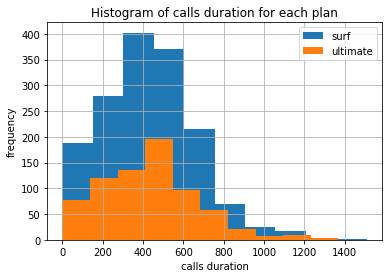

In [41]:
surf['duration_per_month'].hist(), ultimate['duration_per_month'].hist();
plt.xlabel('calls duration')
plt.ylabel('frequency')
plt.legend(['surf', 'ultimate'])
plt.title("Histogram of calls duration for each plan");


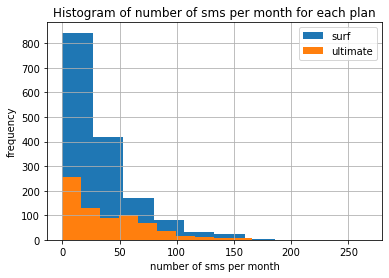

In [42]:
surf['msg_count_per_month'].hist(), ultimate['msg_count_per_month'].hist();
plt.xlabel('number of sms per month')
plt.ylabel('frequency')
plt.legend(['surf', 'ultimate'])
plt.title("Histogram of number of sms per month for each plan");

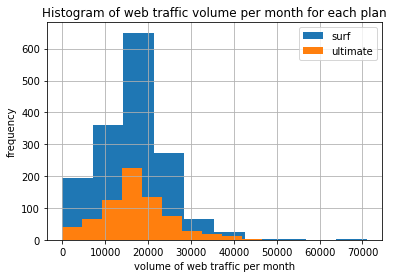

In [43]:
surf['mb_count_per_month'].hist(), ultimate['mb_count_per_month'].hist();
plt.xlabel('volume of web traffic per month')
plt.ylabel('frequency')
plt.legend(['surf', 'ultimate'])
plt.title("Histogram of web traffic volume per month for each plan");

We can see that behavior of clients in both plans is almost the same. 
Most of the clients use 10,000-21,000 mb of web traffic. About 20% of all clients in both calling plans don't send sms at all (probably use other popular messengers) and the number of clients that use this service is decreasing. Most of the clients in both plans speek on the phone between 200 to 600 minutes per month.  

Now we'll calculate average monthly revenue per calling plan. 

In [44]:
monthly_per_user_tariff.head()

,user_id,month,call_count_per_month,duration_per_month,msg_count_per_month,mb_count_per_month,tariff_name,messages_included,mb_per_month_included,minutes_included,...,usd_per_gb,usd_per_message,usd_per_minute,msg_diff,call_diff,mb_diff,msg_cost,calls_cost,mb_cost,profit_per_user
0,1000,12,16.0,124.0,11.0,1903.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-989.0,-2876.0,-28817.0,0.0,0.0,0.000000,70.000000
1,1006,11,2.0,10.0,15.0,2072.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-985.0,-2990.0,-28648.0,0.0,0.0,0.000000,70.000000
2,1006,12,9.0,59.0,139.0,32144.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-861.0,-2941.0,1424.0,0.0,0.0,9.734375,79.734375
3,1008,10,71.0,476.0,21.0,17131.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-979.0,-2524.0,-13589.0,0.0,0.0,0.000000,70.000000
4,1008,11,63.0,446.0,37.0,23706.0,ultimate,1000,30720,3000,...,7,0.01,0.01,-963.0,-2554.0,-7014.0,0.0,0.0,0.000000,70.000000


Separate data for 'ultimate' and 'surf' plans. 

In [45]:
ultimate_profit=monthly_per_user_tariff.query('tariff_name=="ultimate"')

In [46]:
surf_profit=monthly_per_user_tariff.query('tariff_name=="surf"')

In [47]:
ultimate_profit['profit_per_user'].describe()

count    720.000000
mean      72.129290
std       10.814493
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      178.787109
Name: profit_per_user, dtype: float64

In [48]:
surf_profit['profit_per_user'].describe()

count    1573.000000
mean       57.813927
std        53.954401
min        20.000000
25%        20.000000
50%        37.602031
75%        77.363281
max       583.612188
Name: profit_per_user, dtype: float64

In our case we have two different statistical populations. Let's set a critical statistical significance level to 0.05 and equal_var parameter to False. We assume that variences of our populations are not equal. 
We will use two sample t test.  

Null hypothesis: There is no difference between average monthly profit from two plans.

Alternative hypothesis: There is difference between average monthly profit from two plans.

Let's quickly look at two sample t test online calculator and then test our hypothesis applying the method scipy.stats.ttest_ind().

If p-value less than ∝ we reject our Null hypothesis, otherwise we can't reject the Null hypothesis.

https://www.evanmiller.org/ab-testing/t-test.html#!72.11/10.76/720;57.29/53.73/1573@95

In [49]:
alpha = 0.05

results = st.ttest_ind(ultimate_profit['profit_per_user'], surf_profit['profit_per_user'], equal_var = False)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  2.474527749071402e-23
We reject the null hypothesis


So our p-value is less than 0.05, we reject the null hypothesis that there's no difference between average monthly profit from two plans and conclude that a significant difference does exist.

We are going to check if average monthly revenue from users in the NY-NJ area differs from that in other regions.
First, we"ll add city column to monthly_per_user_tariff table. Then divide a new table into two tables:
with data for users from NY_NJ area and without them.

In [50]:
region=monthly_per_user_tariff.merge(df_user, on=['user_id'])
region=region.drop(['first_name','last_name','age','reg_date','churn_date','tariff'], axis=1)
region.head()

,user_id,month,call_count_per_month,duration_per_month,msg_count_per_month,mb_count_per_month,tariff_name,messages_included,mb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,msg_diff,call_diff,mb_diff,msg_cost,calls_cost,mb_cost,profit_per_user,city
0,1000,12,16.0,124.0,11.0,1903.0,ultimate,1000,30720,3000,...,0.01,0.01,-989.0,-2876.0,-28817.0,0.0,0.0,0.000000,70.000000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1006,11,2.0,10.0,15.0,2072.0,ultimate,1000,30720,3000,...,0.01,0.01,-985.0,-2990.0,-28648.0,0.0,0.0,0.000000,70.000000,"San Francisco-Oakland-Berkeley, CA MSA"
2,1006,12,9.0,59.0,139.0,32144.0,ultimate,1000,30720,3000,...,0.01,0.01,-861.0,-2941.0,1424.0,0.0,0.0,9.734375,79.734375,"San Francisco-Oakland-Berkeley, CA MSA"
3,1008,10,71.0,476.0,21.0,17131.0,ultimate,1000,30720,3000,...,0.01,0.01,-979.0,-2524.0,-13589.0,0.0,0.0,0.000000,70.000000,"Orlando-Kissimmee-Sanford, FL MSA"
4,1008,11,63.0,446.0,37.0,23706.0,ultimate,1000,30720,3000,...,0.01,0.01,-963.0,-2554.0,-7014.0,0.0,0.0,0.000000,70.000000,"Orlando-Kissimmee-Sanford, FL MSA"


In [51]:
NY_NJ=region.query('city=="New York-Newark-Jersey City, NY-NJ-PA MSA"')
NY_NJ.head()

,user_id,month,call_count_per_month,duration_per_month,msg_count_per_month,mb_count_per_month,tariff_name,messages_included,mb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,msg_diff,call_diff,mb_diff,msg_cost,calls_cost,mb_cost,profit_per_user,city
30,1031,7,36.0,304.0,1.0,10668.0,ultimate,1000,30720,3000,...,0.01,0.01,-999.0,-2696.0,-20052.0,0.0,0.0,0.0,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
31,1031,8,62.0,483.0,2.0,21646.0,ultimate,1000,30720,3000,...,0.01,0.01,-998.0,-2517.0,-9074.0,0.0,0.0,0.0,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
32,1031,9,76.0,515.0,3.0,13024.0,ultimate,1000,30720,3000,...,0.01,0.01,-997.0,-2485.0,-17696.0,0.0,0.0,0.0,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
33,1031,10,74.0,563.0,2.0,18796.0,ultimate,1000,30720,3000,...,0.01,0.01,-998.0,-2437.0,-11924.0,0.0,0.0,0.0,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
34,1031,11,85.0,611.0,1.0,16221.0,ultimate,1000,30720,3000,...,0.01,0.01,-999.0,-2389.0,-14499.0,0.0,0.0,0.0,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [52]:
NY_NJ['profit_per_user'].describe()

count    377.000000
mean      57.624097
std       42.293857
min       20.000000
25%       20.000000
50%       49.343125
75%       70.557422
max      279.775391
Name: profit_per_user, dtype: float64

In [53]:
other_regions=region[region['city']!="New York-Newark-Jersey City, NY-NJ-PA MSA"]
other_regions.head()

,user_id,month,call_count_per_month,duration_per_month,msg_count_per_month,mb_count_per_month,tariff_name,messages_included,mb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,msg_diff,call_diff,mb_diff,msg_cost,calls_cost,mb_cost,profit_per_user,city
0,1000,12,16.0,124.0,11.0,1903.0,ultimate,1000,30720,3000,...,0.01,0.01,-989.0,-2876.0,-28817.0,0.0,0.0,0.000000,70.000000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1006,11,2.0,10.0,15.0,2072.0,ultimate,1000,30720,3000,...,0.01,0.01,-985.0,-2990.0,-28648.0,0.0,0.0,0.000000,70.000000,"San Francisco-Oakland-Berkeley, CA MSA"
2,1006,12,9.0,59.0,139.0,32144.0,ultimate,1000,30720,3000,...,0.01,0.01,-861.0,-2941.0,1424.0,0.0,0.0,9.734375,79.734375,"San Francisco-Oakland-Berkeley, CA MSA"
3,1008,10,71.0,476.0,21.0,17131.0,ultimate,1000,30720,3000,...,0.01,0.01,-979.0,-2524.0,-13589.0,0.0,0.0,0.000000,70.000000,"Orlando-Kissimmee-Sanford, FL MSA"
4,1008,11,63.0,446.0,37.0,23706.0,ultimate,1000,30720,3000,...,0.01,0.01,-963.0,-2554.0,-7014.0,0.0,0.0,0.000000,70.000000,"Orlando-Kissimmee-Sanford, FL MSA"


In [54]:
other_regions['profit_per_user'].describe()

count    1916.000000
mean       63.230747
std        46.152444
min        20.000000
25%        23.735000
50%        70.000000
75%        70.000000
max       583.612188
Name: profit_per_user, dtype: float64

Like above, we are dealing with two different statistical populations. Set a critical statistical significance level to 0.05 and equal_var parameter to False. 
We will use two sample t test. 

Null hypothesis: There is no difference between average monthly profit from users in the NY-NJ area  from that in other regions.

Alternative hypothesis: There is difference between average monthly profit.

Again we'll use Evan Miller online calculator and st.ttest_ind() method. 

https://www.evanmiller.org/ab-testing/t-test.html#!57.19/42.16/377;62.88/46/1916@95

In [55]:
alpha = 0.05
results = st.ttest_ind(NY_NJ['profit_per_user'], other_regions['profit_per_user'], equal_var = False)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.020871080686859087
We reject the null hypothesis


The p-value is less than 0.05, we reject the null hypothesis that there's no difference between average monthly profit from users in the NY-NJ area from that in other regions and conclude that there is difference between two means.

#### Analasing data of two prepaid calling plans, Surf and Ultimate, we got to conclution that Ultimate plan was more profitable (in terms of average monthly revenue ). 